## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

In [2]:
im = cv2.imread("panda.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(original_shape)

(1365, 2048, 3)


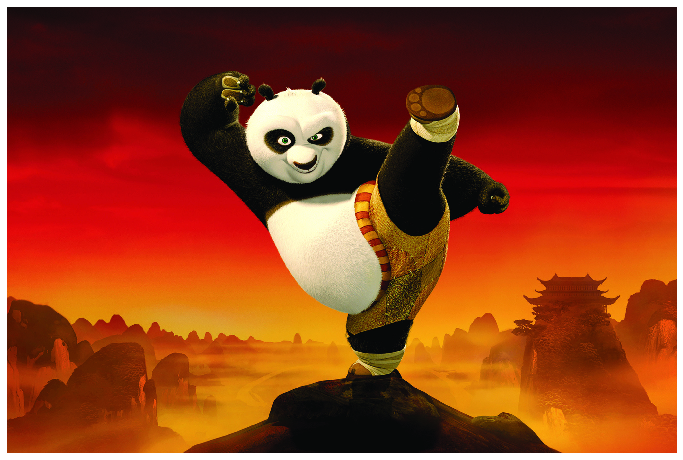

In [3]:
plt.figure(figsize=(12,9))
plt.imshow(im)
plt.axis("off")
plt.show()

In [4]:
#Flatten each channel of the image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(2795520, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors = 5 # Converting into 5 dominant colors

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=5)

In [7]:
#getting those 5 dominant color pixel RGB values
centers = km.cluster_centers_

In [8]:
centers = np.array(centers, dtype='uint8')

In [9]:
print(centers)

[[223 117  11]
 [ 41  11  11]
 [207  24   7]
 [226 216 174]
 [123  32   3]]


## Plot what are those colors

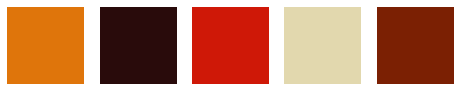

In [10]:
i = 1

plt.figure(figsize=(8, 2))

colors =[]

for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i +=1
    
    colors.append(each_col)
    
    #color swatch
    a = np.zeros((150, 150, 3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

## Segmenting our original color

In [11]:
new_img = np.zeros((1365*2048, 3), dtype='uint8')
print(new_img.shape)

(2795520, 3)


In [12]:
colors

[array([223, 117,  11], dtype=uint8),
 array([41, 11, 11], dtype=uint8),
 array([207,  24,   7], dtype=uint8),
 array([226, 216, 174], dtype=uint8),
 array([123,  32,   3], dtype=uint8)]

In [13]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

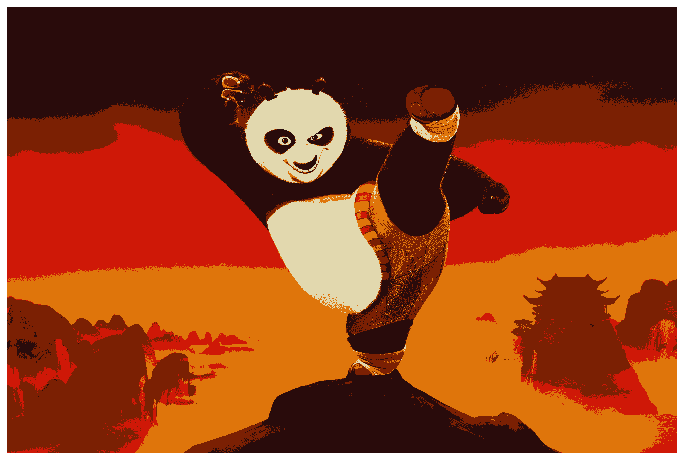

In [14]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]#updating all the pixels as per the new color by K-means 
    
new_img = new_img.reshape((original_shape))
plt.figure(figsize=(12,9))
plt.imshow(new_img)
plt.axis("off")
plt.show()